# 2D Transformations: Translation, Rotation & Scale

This notebook creates a 2D figure, applies geometric transformations using matrices (translation, rotation, and scale) and animates the transformations over time.

## 1. Import Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
from IPython.display import Image

## 2. Define a 2D Figure

We define a house-shaped figure using a set of 2D points. The figure is closed by repeating the first point at the end. We use **homogeneous coordinates** (adding a third coordinate = 1) so we can apply translation, rotation, and scale with a single matrix multiplication.

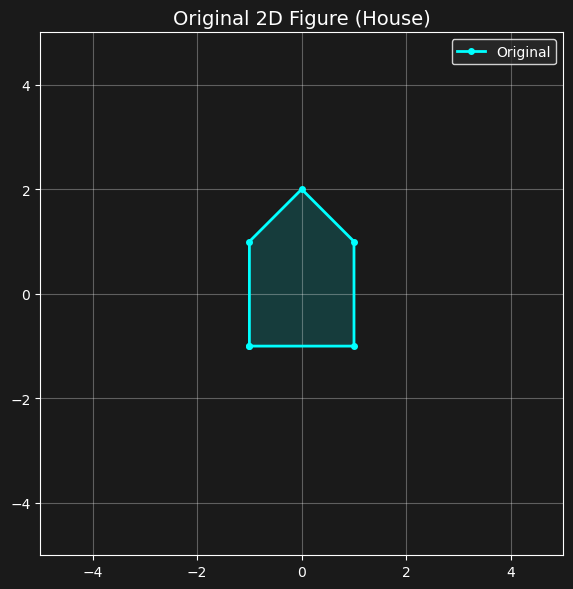

In [19]:
def create_house():
    """
    Create a house-shaped 2D figure as a set of points.
    
    Returns:
    np.ndarray : 3×N matrix in homogeneous coordinates (x, y, 1)
    """
    # House shape: square base + triangular roof
    points = np.array([
        [-1, -1],  # bottom-left
        [ 1, -1],  # bottom-right
        [ 1,  1],  # top-right
        [ 0,  2],  # roof peak
        [-1,  1],  # top-left
        [-1, -1],  # close the shape
    ], dtype=float)
    
    # Convert to homogeneous coordinates (add row of ones)
    ones = np.ones((points.shape[0], 1))
    homogeneous = np.hstack([points, ones])  # shape: (N, 3)
    
    return homogeneous.T  # shape: (3, N) for matrix multiplication


def plot_figure(ax, points, color='cyan', label=None, linewidth=2, alpha=1.0):
    """
    Plot a 2D figure from homogeneous coordinates.
    
    Parameters:
    ax : matplotlib Axes
    points : np.ndarray (3, N) in homogeneous coordinates
    color : str
    label : str
    """
    x = points[0, :]
    y = points[1, :]
    ax.plot(x, y, '-o', color=color, linewidth=linewidth, markersize=4, 
            label=label, alpha=alpha)
    ax.fill(x, y, color=color, alpha=0.15 * alpha)


# Create and display the original house
house = create_house()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_facecolor('#1a1a1a')
fig.patch.set_facecolor('#1a1a1a')
plot_figure(ax, house, color='cyan', label='Original')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3, color='white')
ax.legend(facecolor='#2a2a2a', edgecolor='white', labelcolor='white')
ax.set_title('Original 2D Figure (House)', color='white', fontsize=14)
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')
plt.tight_layout()
plt.show()

## 3. Transformation Matrices

We define the three fundamental 2D transformation matrices using **homogeneous coordinates** (3×3 matrices)

In [20]:
def translation_matrix(tx, ty):
    """
    Create a 2D translation matrix (3×3 homogeneous).
    
    Parameters:
    tx : float – Translation in x
    ty : float – Translation in y
    
    Returns:
    np.ndarray : 3×3 translation matrix
    """
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0,  1]
    ], dtype=float)


def rotation_matrix(angle_deg):
    """
    Create a 2D rotation matrix (3×3 homogeneous).
    
    Parameters:
    angle_deg : float – Rotation angle in degrees
    
    Returns:
    np.ndarray : 3×3 rotation matrix
    """
    theta = np.radians(angle_deg)
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ], dtype=float)


def scale_matrix(sx, sy):
    """
    Create a 2D scale matrix (3×3 homogeneous).
    
    Parameters:
    sx : float – Scale factor in x
    sy : float – Scale factor in y
    
    Returns:
    np.ndarray : 3×3 scale matrix
    """
    return np.array([
        [sx,  0, 0],
        [ 0, sy, 0],
        [ 0,  0, 1]
    ], dtype=float)


def apply_transform(matrix, points):
    """
    Apply a transformation matrix to a set of homogeneous points.
    
    Parameters:
    matrix : np.ndarray (3, 3) – Transformation matrix
    points : np.ndarray (3, N) – Points in homogeneous coordinates
    
    Returns:
    np.ndarray (3, N) – Transformed points
    """
    return matrix @ points


print("Transformation matrices defined")

Transformation matrices defined


## 4. Apply Individual Transformations

Demonstrate each transformation separately on the original figure.

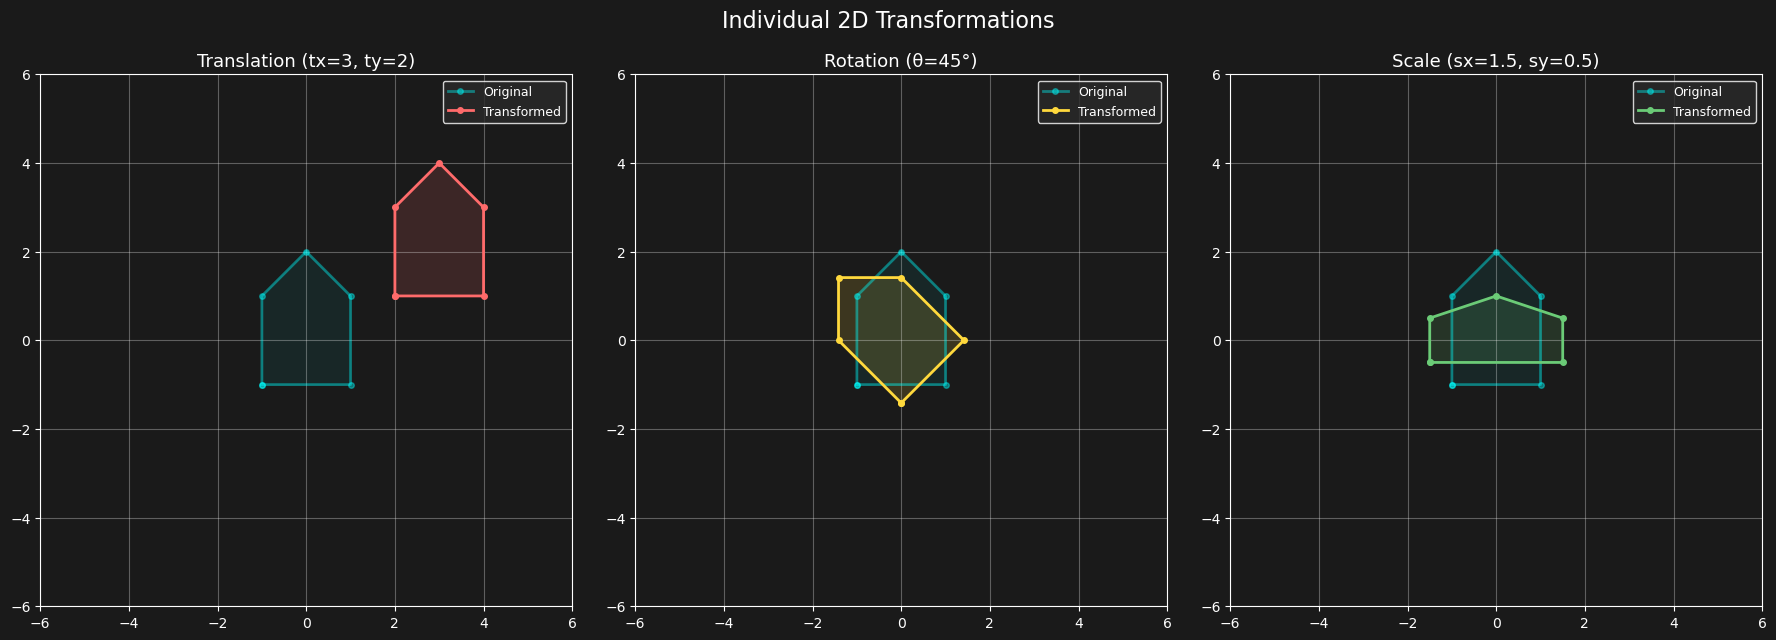

In [21]:
house = create_house()

# Define transformations
T = translation_matrix(3, 2)
R = rotation_matrix(45)
S = scale_matrix(1.5, 0.5)

# Apply each transformation
house_translated = apply_transform(T, house)
house_rotated    = apply_transform(R, house)
house_scaled     = apply_transform(S, house)

# Visualize all three transformations side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('#1a1a1a')

configs = [
    (house_translated, 'Translation (tx=3, ty=2)',    '#ff6b6b'),
    (house_rotated,    'Rotation (θ=45°)',             '#ffd93d'),
    (house_scaled,     'Scale (sx=1.5, sy=0.5)',       '#6bcb77'),
]

for ax, (transformed, title, color) in zip(axes, configs):
    ax.set_facecolor('#1a1a1a')
    plot_figure(ax, house, color='cyan', label='Original', alpha=0.4)
    plot_figure(ax, transformed, color=color, label='Transformed')
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, color='white')
    ax.legend(facecolor='#2a2a2a', edgecolor='white', labelcolor='white', fontsize=9)
    ax.set_title(title, color='white', fontsize=13)
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_color('white')

plt.suptitle('Individual 2D Transformations', color='white', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 5. Composed Transformations

Combined Transformation Matrix (T · R · S):
[[ 1.0392 -0.6     2.    ]
 [ 0.6     1.0392  1.    ]
 [ 0.      0.      1.    ]]


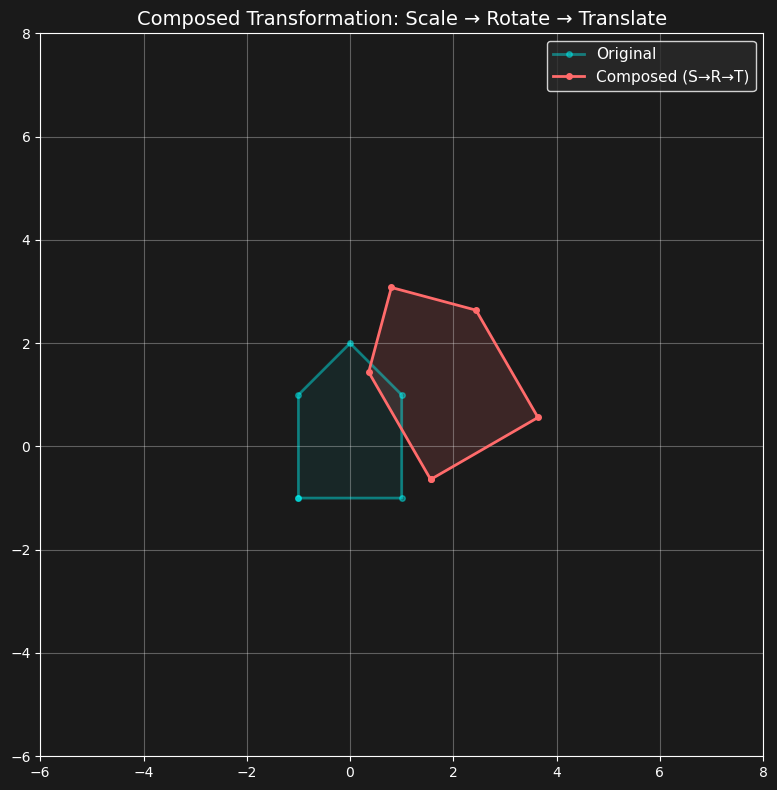

In [22]:
house = create_house()

# Compose: Scale → Rotate → Translate
T = translation_matrix(2, 1)
R = rotation_matrix(30)
S = scale_matrix(1.2, 1.2)

# Combined matrix (applied right to left: first S, then R, then T)
M_combined = T @ R @ S

house_composed = apply_transform(M_combined, house)

# Show the composed transformation matrix
print("Combined Transformation Matrix (T · R · S):")
print(np.round(M_combined, 4))

# Visualize
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('#1a1a1a')
fig.patch.set_facecolor('#1a1a1a')

plot_figure(ax, house, color='cyan', label='Original', alpha=0.4)
plot_figure(ax, house_composed, color='#ff6b6b', label='Composed (S→R→T)')

ax.set_xlim(-6, 8)
ax.set_ylim(-6, 8)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3, color='white')
ax.legend(facecolor='#2a2a2a', edgecolor='white', labelcolor='white', fontsize=11)
ax.set_title('Composed Transformation: Scale → Rotate → Translate', 
             color='white', fontsize=14)
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')
plt.tight_layout()
plt.show()

## 6. Interpolation Function

In [23]:
def lerp(a, b, t):
    """
    Linear interpolation between a and b.
    
    Parameters:
    a : float – Start value
    b : float – End value
    t : float – Interpolation factor [0, 1]
    
    Returns:
    float : Interpolated value
    """
    return a + (b - a) * t


def ease_in_out(t):
    """
    Smooth ease-in-out function using cosine interpolation.
    Maps t ∈ [0,1] → [0,1] with smooth acceleration and deceleration.
    
    Parameters:
    t : float – Linear parameter [0, 1]
    
    Returns:
    float : Eased value [0, 1]
    """
    return (1 - np.cos(t * np.pi)) / 2


def build_animated_matrix(t, tx_end=4, ty_end=3, angle_end=360, sx_end=1.5, sy_end=1.5):
    """
    Build a combined transformation matrix interpolated by parameter t.
    
    Parameters:
    t : float – Animation progress [0, 1]
    tx_end, ty_end : float – Final translation
    angle_end : float – Final rotation angle (degrees)
    sx_end, sy_end : float – Final scale factors
    
    Returns:
    np.ndarray : 3×3 combined transformation matrix at time t
    """
    t_smooth = ease_in_out(t)
    
    tx = lerp(0, tx_end, t_smooth)
    ty = lerp(0, ty_end, t_smooth)
    angle = lerp(0, angle_end, t_smooth)
    sx = lerp(1, sx_end, t_smooth)
    sy = lerp(1, sy_end, t_smooth)
    
    T = translation_matrix(tx, ty)
    R = rotation_matrix(angle)
    S = scale_matrix(sx, sy)
    
    return T @ R @ S


print("Interpolation functions defined")

Interpolation functions defined


## 7. Generate Animation Frames

Render each frame of the animation using a loop over time parameter $t$, and save them as images.

In [24]:
def render_frame(house, t, frame_num, total_frames):
    """
    Render a single animation frame.
    
    Parameters:
    house : np.ndarray (3, N) – Original figure points
    t : float – Animation progress [0, 1]
    frame_num : int – Current frame number
    total_frames : int – Total frames
    
    Returns:
    np.ndarray : RGB image as numpy array
    """
    # Build animated matrix
    M = build_animated_matrix(t, tx_end=3, ty_end=2, angle_end=360, sx_end=1.5, sy_end=1.5)
    house_transformed = apply_transform(M, house)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=80)
    ax.set_facecolor('#1a1a1a')
    fig.patch.set_facecolor('#1a1a1a')
    
    # Draw ghost trail (previous positions, fading)
    n_ghosts = 5
    for i in range(n_ghosts):
        t_ghost = max(0, t - (n_ghosts - i) * 0.03)
        M_ghost = build_animated_matrix(t_ghost, tx_end=3, ty_end=2, 
                                         angle_end=360, sx_end=1.5, sy_end=1.5)
        ghost = apply_transform(M_ghost, house)
        alpha = 0.08 * (i + 1)
        plot_figure(ax, ghost, color='#6bcb77', linewidth=1, alpha=alpha)
    
    # Draw original (faded)
    plot_figure(ax, house, color='cyan', label='Original', alpha=0.3, linewidth=1)
    
    # Draw current transformed figure
    plot_figure(ax, house_transformed, color='#ff6b6b', label='Transformed', linewidth=2.5)
    
    # Info text
    t_smooth = ease_in_out(t)
    info = (f"t = {t:.2f}  |  θ = {lerp(0, 360, t_smooth):.1f}°  |  "
            f"tx = {lerp(0, 3, t_smooth):.2f}  |  scale = {lerp(1, 1.5, t_smooth):.2f}")
    ax.text(0.5, -0.05, info, transform=ax.transAxes, ha='center',
            color='white', fontsize=10, family='monospace',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#2a2a2a', edgecolor='#555'))
    
    ax.set_xlim(-7, 9)
    ax.set_ylim(-7, 9)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.2, color='white')
    ax.legend(facecolor='#2a2a2a', edgecolor='white', labelcolor='white', 
              fontsize=10, loc='upper left')
    ax.set_title(f'2D Transformation Animation — Frame {frame_num+1}/{total_frames}', 
                 color='white', fontsize=14)
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_color('white')
    
    # Convert to image array
    fig.canvas.draw()
    image = np.asarray(fig.canvas.buffer_rgba())[:, :, :3].copy()
    plt.close(fig)
    
    return image


# Generate all frames
house = create_house()
num_frames = 60

frames = []
for i in range(num_frames):
    t = i / (num_frames - 1)
    frame = render_frame(house, t, i, num_frames)
    frames.append(frame)

print(f"Generated {len(frames)} frames ({frames[0].shape[1]}×{frames[0].shape[0]} px)")

Generated 60 frames (640×640 px)


## 8. Export as Animated GIF

Save the generated frames as an animated GIF using `imageio`.

In [25]:
gif_path = "transformation_animation.gif"

# Save GIF with imageio (loop=0 means infinite loop)
imageio.mimsave(gif_path, frames, fps=30, loop=0)

file_size = os.path.getsize(gif_path) / (1024 * 1024)
print("GIF saved: {gif_path} ({file_size:.2f} MB)")
print(f"  • {num_frames} frames at 30 FPS = {num_frames/30:.1f}s duration")

GIF saved: {gif_path} ({file_size:.2f} MB)
  • 60 frames at 30 FPS = 2.0s duration


## 9. Display the Animation

Display the generated GIF inline in the notebook.

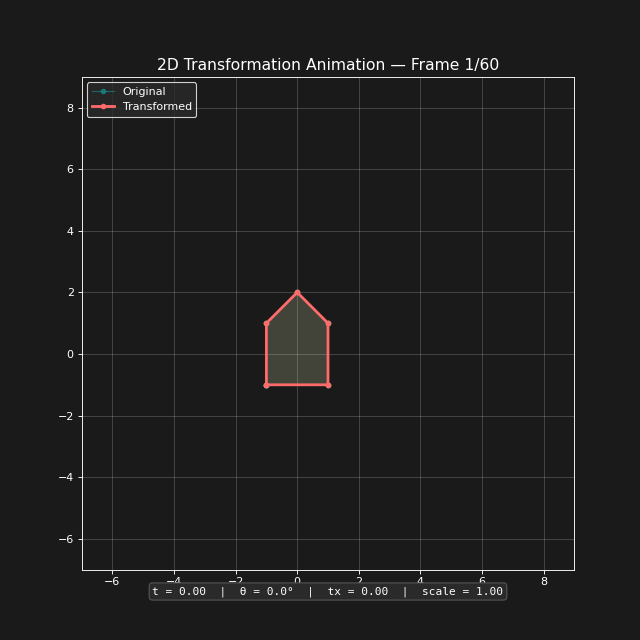

In [26]:
# Display the GIF inline
Image(filename=gif_path)